-----------------
DIRECTION and CIRCLEs PERFORMANCE
----------------

In [9]:
import os, json
import basic_analysis_lib

json_folder = os.path.join(os.path.expanduser('~/'),'Desktop', 'FYP', 'code_env', 'eeg-notebooks','FYP', 'data_ordered', "data_json")
json_files = [file for file in os.listdir(json_folder) if file.endswith(".json")]

csv_path =  os.path.join(os.path.expanduser('~/'), 'Desktop', 'FYP', 'code_env', 'eeg-notebooks', 'FYP', 'data')

all_performances = {}

for file in json_files:
    eeg_json_path = os.path.join(json_folder, file)
    condition, number, value = eeg_json_path.split('\\')[-1].split('_')[0], eeg_json_path.split('\\')[-1].split('_')[1], eeg_json_path.split('\\')[-1].split('_')[2].split('.')[0]
    circles_file_path = fr'C:\Users\matil\Desktop\FYP\code_env\eeg-notebooks\FYP\data\{condition}\{number}\{value}\blue_circles.csv'

    print("Computing performance for experiment: ", file)

    performance = basic_analysis_lib.merge_obj_performance(circles_file_path, eeg_json_path) # TODO
    
    all_performances[file] = performance

new_file_json = os.path.join(os.path.expanduser('~/'), 'Desktop', 'FYP', 'code_env', 'eeg-notebooks', 'FYP', 'results_data', 'Arrow_Circles_performance.json')
json_data = json.dumps(all_performances, indent=4)

with open(new_file_json, 'w') as file:
    file.write(json_data)
    print("New file at ", new_file_json)








Computing performance for experiment:  AudioVisual_01_1.json
Computing performance for experiment:  AudioVisual_01_2.json
Computing performance for experiment:  AudioVisual_02_1.json
Computing performance for experiment:  AudioVisual_03_1.json
Computing performance for experiment:  AudioVisual_03_2.json
Computing performance for experiment:  AudioVisual_04_1.json
Computing performance for experiment:  AudioVisual_04_2.json
Computing performance for experiment:  AudioVisual_05_1.json
Computing performance for experiment:  AudioVisual_05_2.json
Computing performance for experiment:  AudioVisual_06_1.json
Computing performance for experiment:  AudioVisual_06_2.json
Computing performance for experiment:  AudioVisual_07_1.json
Computing performance for experiment:  AudioVisual_07_2.json
Computing performance for experiment:  AudioVisual_09_1.json
Computing performance for experiment:  AudioVisual_09_2.json
Computing performance for experiment:  AudioVisual_10_1.json
Computing performance fo

--------------
Overall Results
--------------

AudioVisual_01_2.json
AudioVisual_02_1.json
AudioVisual_04_1.json
AudioVisual_06_1.json


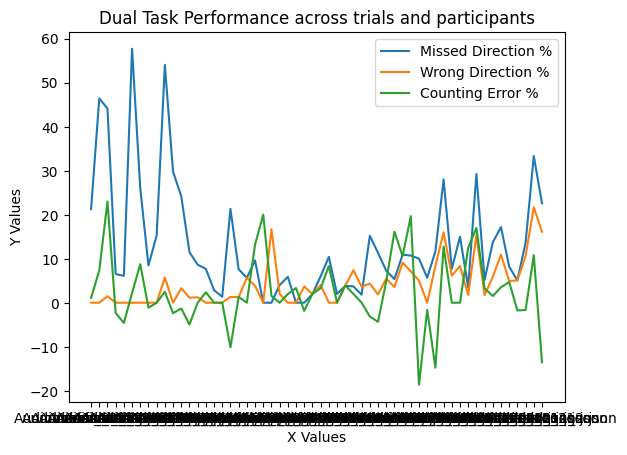

In [10]:
import matplotlib.pyplot as plt

Dir_Missed_pcg = []
Dir_Wrong_pcg = []
Cir_Error_pcg = []

for key in all_performances.keys():
    if all_performances[key]['Dir_Missed_pcg'] > 40:
        print(key)
    elif all_performances[key]['Dir_Wrong_pcg'] > 40:
        print(key)
    
    Dir_Missed_pcg.append(all_performances[key]['Dir_Missed_pcg'])
    Dir_Wrong_pcg.append(all_performances[key]['Dir_Wrong_pcg'])
    Cir_Error_pcg.append(all_performances[key]['Cir_Error_pcg'])

x_values = list(all_performances.keys())
# Plot the three arrays on the same axis
plt.plot(x_values, Dir_Missed_pcg, label='Dir_Missed_pcg')
plt.plot(x_values, Dir_Wrong_pcg, label='Dir_Wrong_pcg')
plt.plot(x_values, Cir_Error_pcg, label='Cir_Error_pcg')

# Customize the plot
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Dual Task Performance across trials and participants')
plt.legend(["Missed Direction %","Wrong Direction %", "Counting Error %"] )

# Display the plot
plt.show()



In [11]:
print("Missed:",Dir_Missed_pcg)
print("Wrong:", Dir_Wrong_pcg)
print("Counting Error:", Cir_Error_pcg)

Missed: [21.25, 46.42857142857143, 44.11764705882353, 6.521739130434782, 6.097560975609756, 57.692307692307686, 26.0, 8.450704225352112, 15.277777777777779, 54.02298850574713, 29.761904761904763, 24.175824175824175, 11.494252873563218, 8.641975308641975, 7.6923076923076925, 2.857142857142857, 1.3513513513513513, 21.333333333333336, 7.59493670886076, 5.660377358490567, 9.615384615384617, 0.0, 0.0, 4.0, 5.88235294117647, 0.0, 0.0, 1.9607843137254901, 6.0, 10.416666666666668, 2.0, 3.8461538461538463, 3.7037037037037033, 1.8181818181818181, 15.217391304347828, 11.320754716981133, 7.2727272727272725, 5.357142857142857, 10.909090909090908, 10.714285714285714, 10.0, 5.660377358490567, 11.666666666666666, 28.000000000000004, 7.6923076923076925, 15.0, 3.508771929824561, 29.230769230769234, 5.172413793103448, 13.725490196078432, 17.1875, 8.19672131147541, 5.084745762711865, 13.636363636363635, 33.33333333333333, 22.58064516129032]
Wrong: [0.0, 0.0, 1.4705882352941175, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [14]:
import numpy as np
print("Missed Directions: mean", np.mean(Dir_Missed_pcg), "std:", np.std(Dir_Missed_pcg))
print("Wrong Directions: mean", np.mean(Dir_Wrong_pcg), "std:", np.std(Dir_Wrong_pcg))
print("COunting Error: mean", np.mean(Cir_Error_pcg), "std:", np.std(Cir_Error_pcg))

Missed Directions: mean 13.32381124942908 std: 13.246714633861101
Wrong Directions: mean 4.243349642434747 std: 5.061214476545235
COunting Error: mean 2.4519888865788224 std: 7.9535774244236315


--------------
Comparative Results
-----------------

In [16]:
import matplotlib.pyplot as plt

Dir_Missed_pcg = {'Audio': [], 'Vibro': [], 'Shape': []}
Dir_Wrong_pcg =   {'Audio': [], 'Vibro': [], 'Shape': []}
Cir_Error_pcg =   {'Audio': [], 'Vibro': [], 'Shape': []}

for key in all_performances.keys():
    idx = 0
    if "Audio" in key:
        idx = 'Audio'
    elif "Vibro" in key:
        idx = 'Vibro'
    elif "Shape" in key:
        idx = 'Shape'
    
    Dir_Missed_pcg[idx].append(all_performances[key]['Dir_Missed_pcg'])
    Dir_Wrong_pcg[idx].append(all_performances[key]['Dir_Wrong_pcg'])
    Cir_Error_pcg[idx].append(all_performances[key]['Cir_Error_pcg'])


In [20]:

x_values = list(all_performances.keys())
# Plot the three arrays on the same axis
for key in Dir_Missed_pcg.keys():
    
    # plt.plot(Dir_Missed_pcg[key], label='Dir_Missed_pcg')
    # plt.plot(Dir_Wrong_pcg[key], label='Dir_Wrong_pcg')
    # plt.plot(Cir_Error_pcg[key], label='Cir_Error_pcg')

    # # Customize the plot
    # plt.xlabel('X Values')
    # plt.ylabel('Y Values')
    # plt.title(f'Dual Task Performance across participants, mode {key} ')
    # plt.legend(["Missed Direction %","Wrong Direction %", "Counting Error %"] )

    # Display the plot
    plt.show()
    print("-----------", key, "------------")
    print("Missed Directions: mean", np.mean(Dir_Missed_pcg[key]), "std:", np.std(Dir_Missed_pcg[key]))
    print("Wrong Directions: mean", np.mean(Dir_Wrong_pcg[key]), "std:", np.std(Dir_Wrong_pcg[key]))
    print("Counting Error: mean", np.mean(Cir_Error_pcg[key]), "std:", np.std(Cir_Error_pcg[key]))



----------- Audio ------------
Missed Directions: mean 21.092753992502857 std: 17.269965536617086
Wrong Directions: mean 0.8156614355533355 std: 1.4444995160845127
Counting Error: mean 1.1428435938388624 std: 6.552557406608574
----------- Vibro ------------
Missed Directions: mean 13.196467641283093 std: 8.503156863492219
Wrong Directions: mean 8.15838916911903 std: 5.439820159220156
Counting Error: mean 3.267415523178895 std: 10.241236680062995
----------- Shape ------------
Missed Directions: mean 4.790691252047773 std: 4.398071064705677
Wrong Directions: mean 3.468366430497169 std: 3.933411408814782
Counting Error: mean 2.9558258177586936 std: 5.835520346925811
